# <center>ИССЛЕДОВАНИЕ ИСТОЧНИКОВ ТРАФИКА, ОПРЕДЕЛЕНИЕ НЕВЫГОДНЫХ СРЕДИ НИХ. СОВЕТЫ ПО ПЕРЕРАСПРЕДЕЛЕНИЮ БЮДЖЕТА</center>

Маркетологам Яндекс.Афиши  необходимо помочь снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Имеем данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Перед нами стоят следующие задачи:
- изучить данные,
- рассчитать метрики и построить графики,
- сформулировать выводы и рекомендации.

Цель проекта - на основе проведенного исследования дать рекомендации маркетологам, куда и сколько им вкладывать денег.

## ИЗУЧЕНИЕ ДАННЫХ

In [1]:
# Отключаем предупреждения 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# выводим общую информацию по таблице с информацией о посещении сайта
visits_log = pd.read_csv('/Users/ruslan/Downloads/DataSets/visits_log.csv')
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits_log.head(5)  # выводим первые 5 строк этой таблицы

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# выводим общую информацию по таблице с информацией о заказах
orders_log = pd.read_csv('/Users/ruslan/Downloads/DataSets/orders_log.csv')
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
orders_log.head(5) # выводим первые 5 строк этой таблицы

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
# выводим общую информацию по таблице с информацией по расходам на маркетинг
costs = pd.read_csv('/Users/ruslan/Downloads/DataSets/costs.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
costs.head(5) # выводим первые 5 строк этой таблицы

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

### ВЫВОД

Данные не содержат пропусков.
Столбцы, содержащие дату и время, необходимо привести к типу datetime, названия столбцов привести к нижнему регистру.

## ПОДГОТОВКА ДАННЫХ

In [10]:
# с помощью функции map() применяем нижний регистр строки ко всем столбцам таблицы
visits_log.columns = map(str.lower, visits_log.columns)
# заменяем пробел в названии столбцов
visits_log = visits_log.rename(columns={'end ts' : 'end_ts', 'start ts': 'start_ts', 'source id': 'source_id'}) 
visits_log.columns # выведем все названия столбцов для проверки результата

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

То же самое выполним для табицы с информацией о заказах

In [11]:
orders_log.columns = map(str.lower, orders_log.columns)
orders_log = orders_log.rename(columns={'buy ts' : 'buy_ts'})
orders_log.columns 

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [12]:
# приводим столбцы, содержащие дату и время, к формату datetime
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format='%Y-%m-%dT%H:%M:%S')
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format='%Y-%m-%dT%H:%M:%S')
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'], format='%Y-%m-%dT%H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

Проверим наличие дубликатов в таблицах

In [13]:
visits_log.duplicated().sum()

0

In [14]:
orders_log.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

Проверим, не выходят ли пользовательские сессии за граница рассматриваемого периода с июня 2017 года по май 2018 года.

In [16]:
visits_log['start_ts'].min()

Timestamp('2017-06-01 00:01:00')

In [17]:
visits_log['start_ts'].max()

Timestamp('2018-05-31 23:59:00')

In [18]:
visits_log['end_ts'].min()

Timestamp('2017-06-01 00:02:00')

In [19]:
visits_log['end_ts'].max()

Timestamp('2018-06-01 01:26:00')

In [20]:
orders_log['buy_ts'].min()

Timestamp('2017-06-01 00:10:00')

In [21]:
orders_log['buy_ts'].max()

Timestamp('2018-06-01 00:02:00')

In [22]:
costs['dt'].min()

Timestamp('2017-06-01 00:00:00')

In [23]:
costs['dt'].max()

Timestamp('2018-05-31 00:00:00')

Самая поздняя дата завершения пользовательской сессии, а так же дата совершения покупки выходят за пределы рассматриваемого периода. Отбросим ненужные данные.

In [24]:
visits_log = visits_log.query('end_ts < "2018-06-01"')

In [25]:
orders_log = orders_log.query('buy_ts < "2018-06-01"')

Рассмотрим столбец с категорией устройства (*device*) таблицы с информацией о посещениях сайта, посчитаем, как распределено количество уникальных пользователей.

In [26]:
visits_log.groupby('device').agg({'uid': 'nunique'}).reset_index()

,device,uid
0,desktop,164517
1,touch,71343


С компьютера на сайт заходит в 2 раза больше посетителей. Т.к. варианта всего два, можем заменить тип данных этого столбца на категориальный.

In [27]:
visits_log['device'] = visits_log['device'].astype('category')

Рассмотрим столбец с источниками трафика (*source_id*) таблицы с информацией о посещениях сайта, посчитаем, как распределено количество уникальных пользователей по ним.

In [28]:
visits_log.groupby('source_id').agg({'uid': 'nunique'})

,uid
source_id,
1,18998
2,26244
3,74755
4,83523
5,56972
6,6
7,34
9,9264
10,8066


Построим для наглядности график.

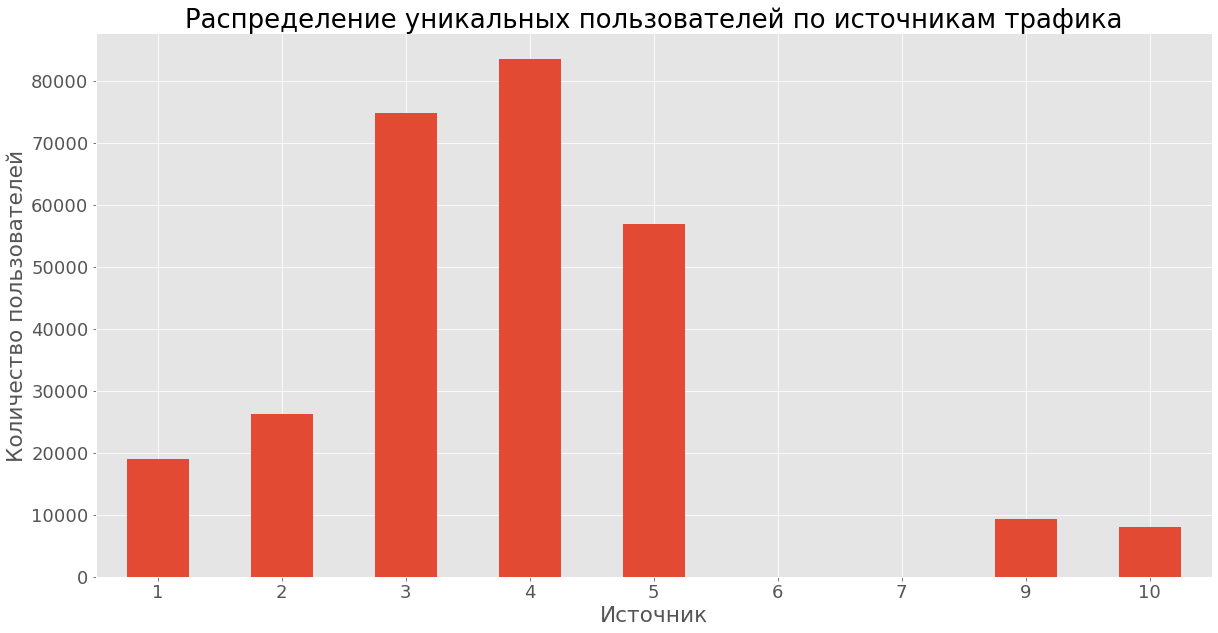

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # выбираем оформление в стиле ggplot
plt.rcParams.update({'font.size': 18}) # размер шрифта на графике

visits_log.groupby('source_id').agg({'uid': 'nunique'}).reset_index().plot.bar(
    
    x='source_id',
    y='uid', 
    grid=True,
    figsize=(20,10)
)
plt.title('Распределение уникальных пользователей по источникам трафика')
plt.ylabel('Количество пользователей')
plt.xlabel('Источник')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

По графику видно, что источники трафика 6 и 7 привлекают слишком мало пользователей, от них точно стоит отказаться. Больше всего посетителей "приходят" через 4, 3 и 5 источники (в порядке убывания соответственно).

### ВЫВОД

Дубликаты не обнаружены, типы данных и названия столбцов изменены, отброшены данные, не подходящие под рассматриваемый период, проанализированы источники трафика.

## МЕТРИКИ И ГРАФИКИ

### ПРОДУКТОВЫЕ МЕТРИКИ

Чтобы посчитать количество уникальных пользователей за день, неделю и месяц, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [30]:
# с помощью метода dt выделяем из даты start_ts дату, год, месяц, неделю и день и добавляем новые столбцы
visits_log['date'] = visits_log['start_ts'].dt.date
visits_log['year'] = visits_log['start_ts'].dt.year
visits_log['month'] = visits_log['start_ts'].dt.month
visits_log['week'] = visits_log['start_ts'].dt.week
visits_log['day'] = visits_log['start_ts'].dt.day
visits_log.head() # выведем первые строки получившейся таблицы

,device,end_ts,source_id,start_ts,uid,date,year,month,week,day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,12,51,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2,8,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,5,20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,12,52,27


Теперь посчитаем метрики.

In [31]:
dau_mean = visits_log.groupby('date').agg({'uid': 'nunique'}).mean()
wau_mean = visits_log.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_mean = visits_log.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день в среднем:', int(dau_mean))
print('Количество уникальных пользователей в неделю в среднем:', int(wau_mean))
print('Количество уникальных пользователей в месяц в среднем:', int(mau_mean))

Количество уникальных пользователей в день в среднем: 907
Количество уникальных пользователей в неделю в среднем: 5716
Количество уникальных пользователей в месяц в среднем: 23227


Отобразим изменения метрик во времени на графике.

In [32]:
dau = visits_log.groupby('date').agg({'uid': 'nunique'}).reset_index()
wau = visits_log.groupby(['year', 'week']).agg({'uid': 'nunique'}).reset_index()
mau = visits_log.groupby(['year', 'month']).agg({'uid': 'nunique'}).reset_index()

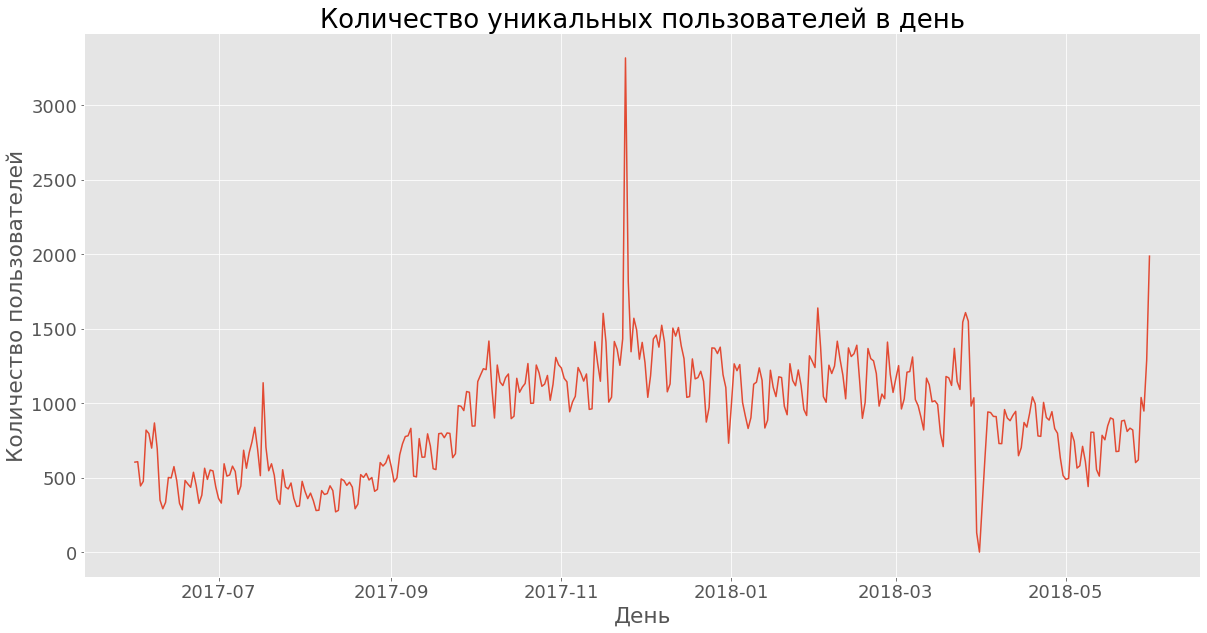

In [33]:
import matplotlib.pyplot as plt # импортируем библиотеку mathlib

plt.style.use('ggplot') # выбираем оформление в стиле ggplot
plt.rcParams.update({'font.size': 18}) # размер шрифта на графике

dau.plot(
    x='date',
    y='uid', 
    grid=True,
    figsize=(20,10)
)

plt.title('Количество уникальных пользователей в день')
plt.ylabel('Количество пользователей')
plt.xlabel('День')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

По графику видно, что количество уникальных пользователей резко возрастает ближе к декабрю, скорее всего это объясняется предновогодним предпраздничным временем.

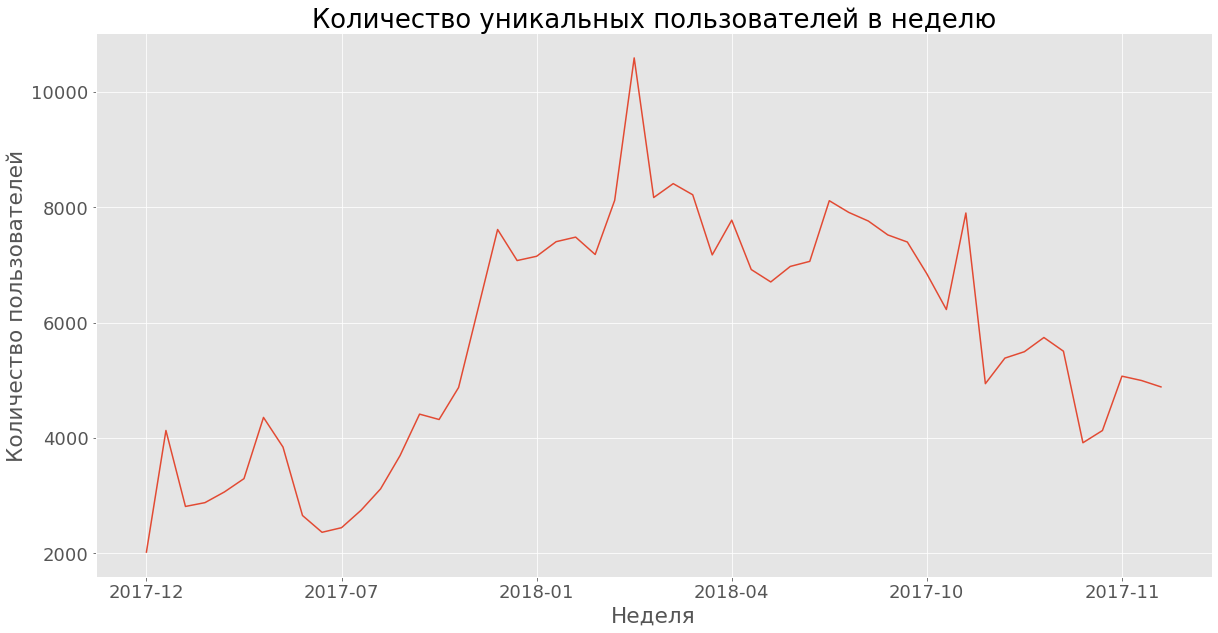

In [34]:
import datetime
wau['wau_week'] = visits_log['start_ts'].dt.strftime('%Y-%m')

wau.plot(
    x='wau_week',
    y='uid', 
    grid=True,
    figsize=(20,10)
)

plt.title('Количество уникальных пользователей в неделю')
plt.ylabel('Количество пользователей')
plt.xlabel('Неделя')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

Недельный график повторяет тренды дневного.

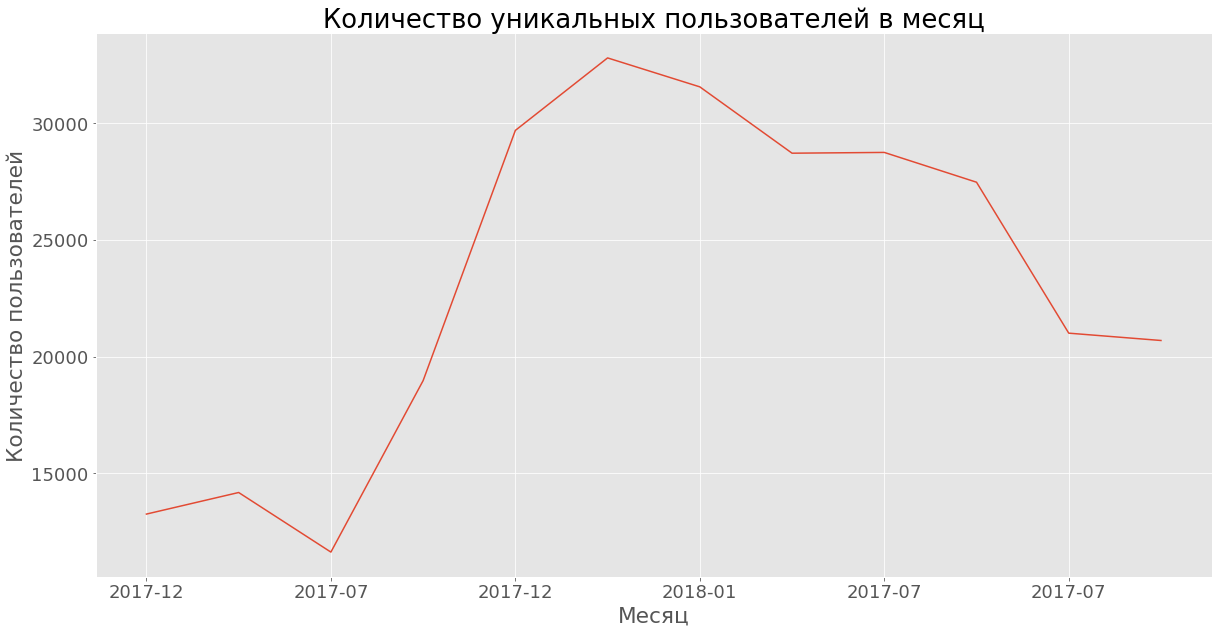

In [35]:
mau['mau_week'] = visits_log['start_ts'].dt.strftime('%Y-%m')
mau.plot(
    x='mau_week',
    y='uid', 
    grid=True,
    figsize=(20,10)
)

plt.title('Количество уникальных пользователей в месяц')
plt.ylabel('Количество пользователей')
plt.xlabel('Месяц')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

А вот на графике, отображающем количество уникальных посетителей за месяц, видим большой рост после июля 2017 года, возможно в это время была проведена какая-то маркетинговая кампания, которая обеспечила большой приток новых посетителей.

Определим, сколько раз за день пользователи в среднем заходят на сайт, для этого вычислим *sticky factor*.

In [36]:
sf = (dau_mean / wau_mean) * 100
print('Коэффициент вовлеченности пользователей за день', int(sf))

Коэффициент вовлеченности пользователей за день 15


Рассчитав *sticky factor* выяснили, что у сайта хороший уровень вовлеченности(активности) аудитории 

Далее выясним, сколько времени пользователи проводят на сайте, рассчитаем продолжительность типичной пользовательской сессии за весь период.

In [37]:
sessions_per_user = visits_log.groupby(['year', 'month']).agg({'uid': ['count', 'nunique']})

In [38]:
sessions_per_user.columns = ['n_sessions', 'n_users'] # переименовываем столбцы
# считаем и добавляем столбец с продолжительностью сессии на пользователя за каждый месяц
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users'] 
)
sessions_per_user

n_sessions  n_users  sessions_per_user
year month                                        
2017 6           16505    13259           1.244815
     7           17828    14183           1.256998
     8           14355    11631           1.234202
     9           23907    18975           1.259921
     10          37903    29692           1.276539
     11          43969    32797           1.340641
     12          41983    31557           1.330386
2018 1           36939    28716           1.286356
     2           37182    28749           1.293332
     3           35679    27473           1.298693
     4           26515    21008           1.262138
     5           26623    20694           1.286508

Рассчитаем продолжительность сессии в секундах на каждого пользователя.

In [39]:
visits_log['session_duration_sec'] = (
    visits_log['end_ts'] - visits_log['start_ts']
).dt.seconds
print(visits_log['session_duration_sec'].mean()) 

643.4657028058812


Получили среднее значение - 643,5 секунды. Посмотрим на гистограмму продолжительности сессий и посмотрим, на сколько такой результат соответствует действительности.

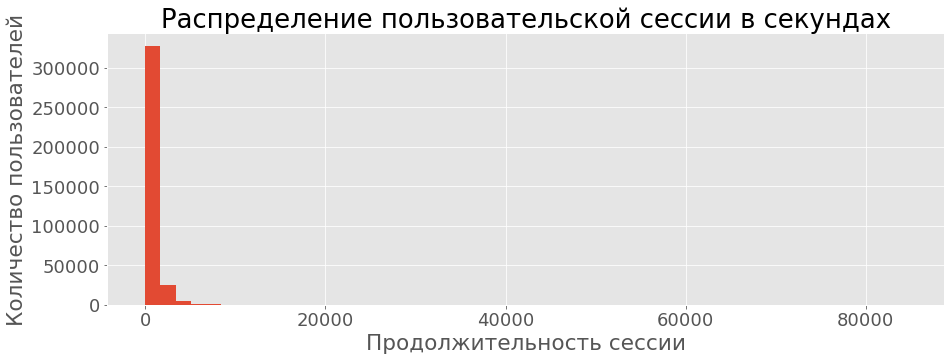

In [40]:
visits_log['session_duration_sec'].hist(bins=50, figsize=(15,5) )
plt.title('Распределение пользовательской сессии в секундах')
plt.ylabel('Количество пользователей')
plt.xlabel('Продолжительность сессии')
plt.show()

Распределение далеко от нормального, для того, чтобы узнать типичную длину пользовательской сессии лучше вычислить моду:

In [41]:
print(visits_log['session_duration_sec'].mode()[0]) 

60


Средняя пользовательская сессия длится 60 секунд, всего 1 минут, это можно объяснить тем, что посетители приходят уже зная, что им нужно, открывают нужную страницу и совершают покупку или же наоборот не совершают и закрывают страницу.

Нам нужно рассчитать *Retention Rate*, поэтому будем исследовать поведение людей, которых объединяет время первого визита на сайт. Т.к. посещения сайта Яндекс.Афиши не слишком динамичное за рассчетный период возьмем месяц.

In [42]:
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])
first_activity_date = visits_log.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits_log = visits_log.merge(first_activity_date, on='uid')

visits_log['month'] = visits_log['start_ts'].astype('datetime64[M]')

visits_log['first_activity_month'] = visits_log['first_activity_date'].astype('datetime64[M]')

visits_log['cohort_lifetime'] = (
    visits_log['month'] - visits_log['first_activity_month']
)

visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype('int')

cohorts = visits_log.groupby(['first_activity_month', 'cohort_lifetime']).agg(
    {'uid': 'nunique'}
).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]

initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

cohorts['first_activity_month'] = cohorts['first_activity_month'].astype('str')

retention_pivot = cohorts.pivot_table(
    index ='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

print(retention_pivot)

cohort_lifetime        0         1         2         3         4         5   \
first_activity_month                                                          
2017-06-01            1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01            1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01            1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01            1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01            1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01            1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01            1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01            1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02-01            1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03-01            1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04-01            1.0  0.048380       NaN       

Получили таблицу, в которой в индексах находится дата первого визита на сайт, месяц, который определяет когорту, в наименованиях столбцов - срок жизни посетителя, значения - коэффициент удержания клиента.
Для большей наглядности построим тепловую карту.

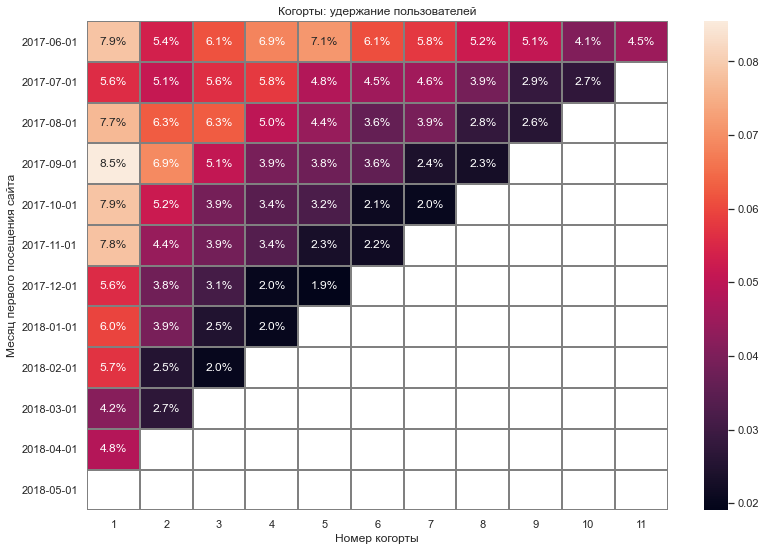

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

retention_pivot = retention_pivot.drop(retention_pivot.columns[0], axis=1)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: удержание пользователей')

sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.ylabel('Месяц первого посещения сайта')
plt.xlabel('Номер когорты')
plt.show()

Во всех когортах на первый месяц *lifetime* по сравнению с нулевым *Retention Rate* уменьшается. *Retention Rate* в первый месяц в разных когортах ведет себя по-разному. Если для когорты пользователей, пришедших с июня по июль 2017 года Retention Rate в первую неделю составляет 7,9%, то для пользователей, пришедших с июля по августа — уже 5,6%. Далее мы снова наблюдаем рост. 
Сильнее всего падает количество пользователей после первого месяца, затем немного подрастает в некоторых когортах. Т.е. часть пользователей возвращается на сайт, после того, как не интересовались им в первый месяц *lifetime*.

Рассчитаем среднее значение *Retention Rate* за второй месяц жизни когорт.

In [44]:
retention_pivot[1].median()

0.05971534653465346

Т.е. в среднем во второй месяй жизни когорот возвращется 5.97% посетителей сайта.

### МЕТРИКИ ЭЛЕКТРОННОЙ КОММЕРЦИИ

Создадим таблицу с датой первого посещения сайта для каждого пользователя.

In [45]:
df = visits_log.pivot_table(
    index='uid', values='start_ts', aggfunc='min'
).reset_index()
df.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Из таблицы с заказами выделим дату первой покупки так же для каждого пользователя.

In [46]:
orders = orders_log.pivot_table(index='uid', values='buy_ts', aggfunc='min').reset_index()
orders.head()

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Объединим эти таблицы.

In [47]:
purchase = df.merge(orders, on='uid')
purchase.head()

,uid,start_ts,buy_ts
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Теперь посмотрим, сколько проходит времени с момента первого посещения сайта до момента совершения покупки.

In [48]:
mean_time = (purchase['buy_ts'] - purchase['start_ts']).dt.seconds # считаем эту разницу в секундах
mean_time.head()

0    82920
1        0
2     4740
3    71040
4        0
dtype: int64

Построим распределение.

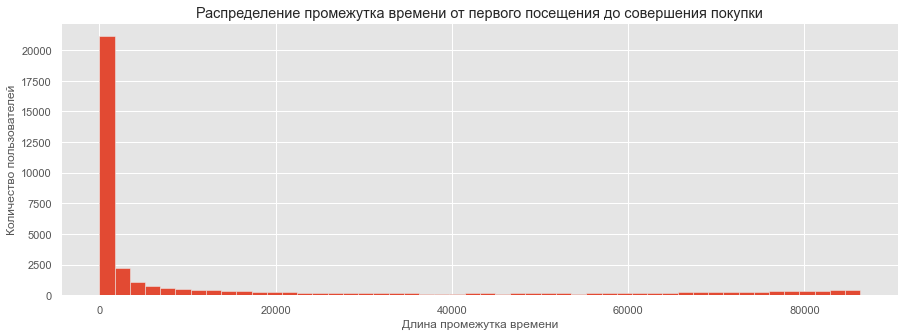

In [49]:
plt.style.use('ggplot')
mean_time.hist(bins=50, figsize=(15,5))
plt.title('Распределение промежутка времени от первого посещения до совершения покупки')
plt.ylabel('Количество пользователей')
plt.xlabel('Длина промежутка времени')
plt.show()

Видно, что распределение отличается от нормального, у нас есть явно выделяющийся пик на 60 секунд, но так же есть и длинный "хвост", который уходит за сутки. Вычисли моду и медиану

In [50]:
print(mean_time.mode()[0])
print(mean_time.median())

60
960.0


Чаще всего посетители проводят минуту на сайте до совершения покупки, но в "среднем" с момента первого посещения сайта до совершения покупки проходит 960 секунд (16 минут).

Рассчитаем среднее количество покупок.

In [51]:
mean_purchases = orders_log

In [52]:
# выделяем из даты покупки месяц и год

mean_purchases['month'] = orders_log['buy_ts'].dt.month
mean_purchases['year'] = orders_log['buy_ts'].dt.year
mean_purchases.head()

,buy_ts,revenue,uid,month,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017


In [53]:
# отсортируем таблицу, возьмем данные за первые 6 месяцев рассматриваемого периода

mean_purchases = mean_purchases.query('month < 12 and year == 2017')
mean_purchases.groupby('uid')['uid'].count().mean()

1.3021816399068513

В среднем один покупатель совершает 1-2 покупки в рассмотренный период с июня по ноябрь 2017 года, покупатели возвращаются за повторными покупками, но редко.

Рассчитаем средний чек покупки.

In [54]:
orders_log.drop('month', axis=1, inplace=True)

In [55]:
orders_log.drop('year', axis=1, inplace=True)

In [56]:
orders_log['order_month'] = orders_log['buy_ts'].dt.strftime('%Y-%m')

In [57]:
# aov - average order value
aov = orders_log.pivot_table(index='order_month', values='revenue', aggfunc='mean').reset_index()
aov

,order_month,revenue
0,2017-06,4.060106
1,2017-07,5.306589
2,2017-08,4.847139
3,2017-09,5.416448
4,2017-10,4.928280
5,2017-11,4.783518
6,2017-12,5.852139
7,2018-01,4.112927
8,2018-02,4.840095
9,2018-03,5.413930


Построим график, посмотрим, как меняется средний чек с течением времени.

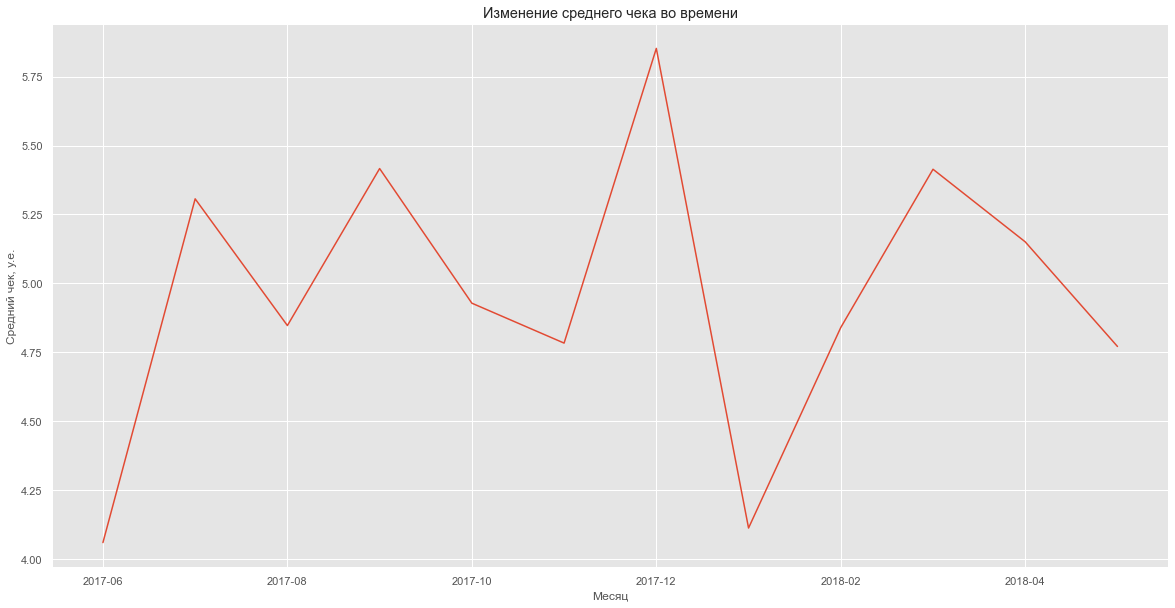

In [58]:
aov.plot(
    x='order_month',
    y='revenue', 
    grid=True,
    figsize=(20,10)
)

plt.title('Изменение среднего чека во времени')
plt.ylabel('Средний чек, у.е.')
plt.xlabel('Месяц')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

Видим, что от месяца к месяцу средний чек изменяется, максимума достигает в декабре и сильно падает в январе, скорее всего объясняется это сезонностью (декабрь - время предпраздничной суеты, январь - время затишья). Так же видим сильное снижение в конеце рассматриваемого периода, начиная с марта 2018 года средний чек уменьшается.

Посчитаем средний чек за весь рассматриваемый период.

In [59]:
average_value = aov['revenue'].mean()
round(average_value, 2)

4.96

Средний чек за весь период - 4.96 у.е.

Посчитаем количество покупателей в каждой когорте.

In [60]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
first_order = orders_log.join(first_order_date, on='uid') # добавляем в таблицу дату первого заказа
first_order.head()

,buy_ts,revenue,uid,order_month,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01 07:58:00


In [61]:
first_order['order_month'] = first_order['buy_ts'].astype('datetime64[M]')
first_order.head()

,buy_ts,revenue,uid,order_month,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00


In [62]:
first_order['first_order_month'] = first_order['first_order_date'].astype('datetime64[M]')

In [63]:
# считаем количество покупателей в когорте
cohort_sizes = first_order.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [64]:
# формируем таблицу с доходом по каждой когорте
cohorts = (
    first_order.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

In [65]:
# создаем таблицу для расчет LTV
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Т.к. маржинальность равна 100%, то можем в рассчетах использовать столбец c доходами(*revenue*).

In [66]:
# добовляем время жизни когорты
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')

In [67]:
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [68]:
report['ltv'] = report['revenue'] / report['n_buyers']

report['first_order_month'] = report['first_order_month'].astype('str')

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

output.fillna('') 

# считаем накопительный LTV
output = output.cumsum(axis=1).round(2) 
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту для LTV.

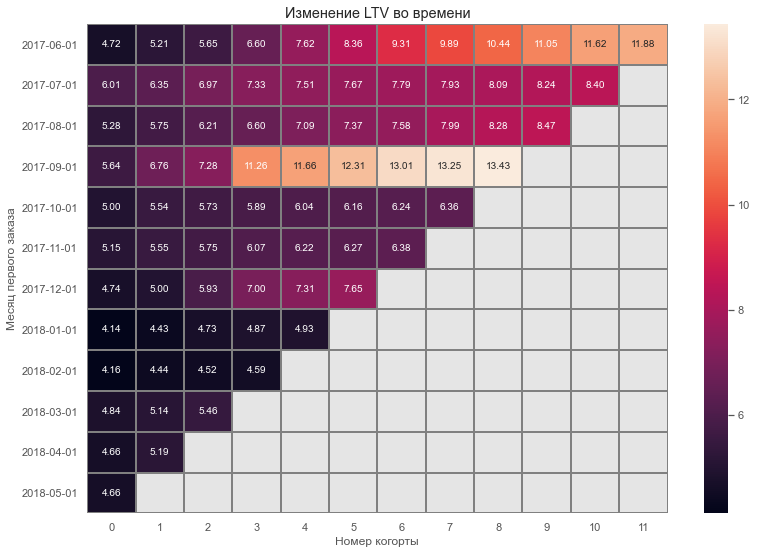

In [69]:
plt.figure(figsize=(13, 9))
plt.title('Изменение LTV во времени')
sns.heatmap(output, fmt='.2f', annot=True, linewidths=1, linecolor='gray')
plt.ylabel('Месяц первого заказа')
plt.xlabel('Номер когорты')
plt.show()

Отметим, что больше всего прибыли принесли когорты июня и сентября 2017 года, остальные не отличаются сильным ростом. Далее рассчитаем среднюю ценность клиента за 6 месяцев.

In [70]:
final_result = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
)

cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]

print('Средний LTV за 6 месяцев после первой покупки:', cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.969052630207335


Чтобы вложения в маркетинг окупались, привлечение одного покупателя не должно превышать 7.97 у.е. в месяц.

### МАРКЕТИНГОВЫЕ МЕТРИКИ

Рассмотрим данные с информацией о расходах на маркетинг.

Вычислим стоимость привлечения клиента в зависимости от рекламного источника

In [71]:
cost_pivot_sum = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').reset_index()
cost_pivot_sum

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


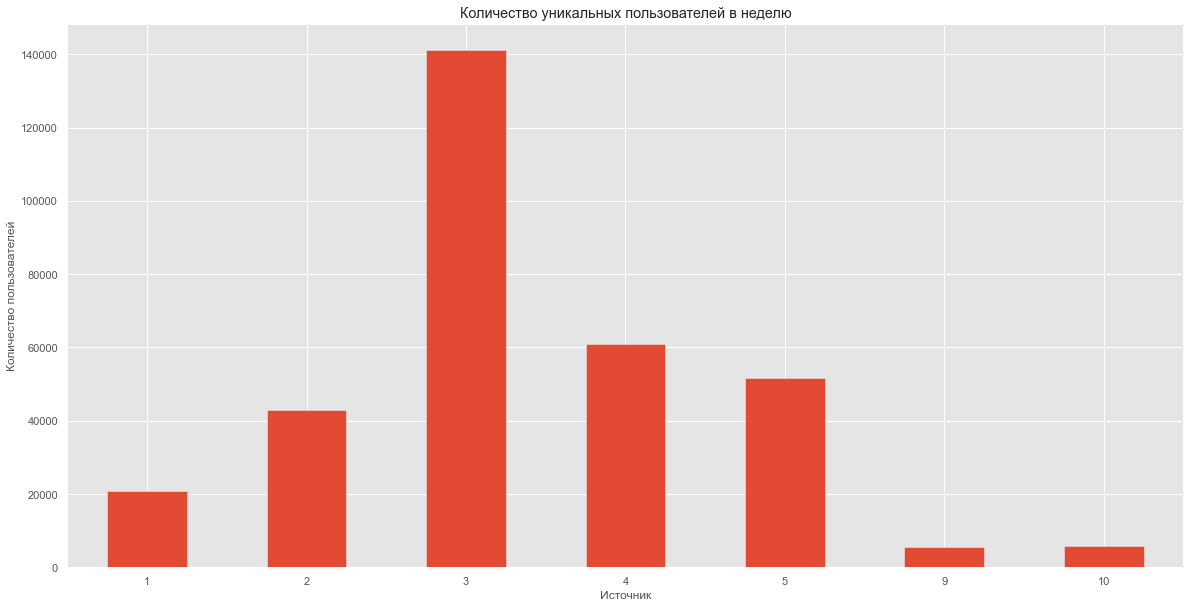

In [72]:
cost_pivot_sum.plot.bar(
    x='source_id',
    y='costs', 
    grid=True,
    figsize=(20,10)
)

plt.title('Количество уникальных пользователей в неделю')
plt.ylabel('Количество пользователей')
plt.xlabel('Источник')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

По графику видно, что в 3 источник трафика было вложено больше всего денег, а в 6 и 7 - совсем ничего(отсутствуют в таблице и на грачике), поэтому и приток посетителей через эти источники трафика самый низкий (это мы отметили на этапе предобработки данных).

In [73]:
cost_sum = cost_pivot_sum['costs'].sum()
cost_sum.round()

329132.0

Общие затраты на маркетинг за весь исследуемый период - 329132 у.е.

In [74]:
cost_pivot_time = costs.copy()

In [75]:
cost_pivot_time['month'] = costs['dt'].dt.strftime('%Y-%m')
cost_pivot_time.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


Рассчитаем затраты на маркетинг по месяцам.

In [76]:
cost_month = cost_pivot_time.pivot_table(index='month', values='costs', aggfunc='sum').reset_index()
cost_month

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


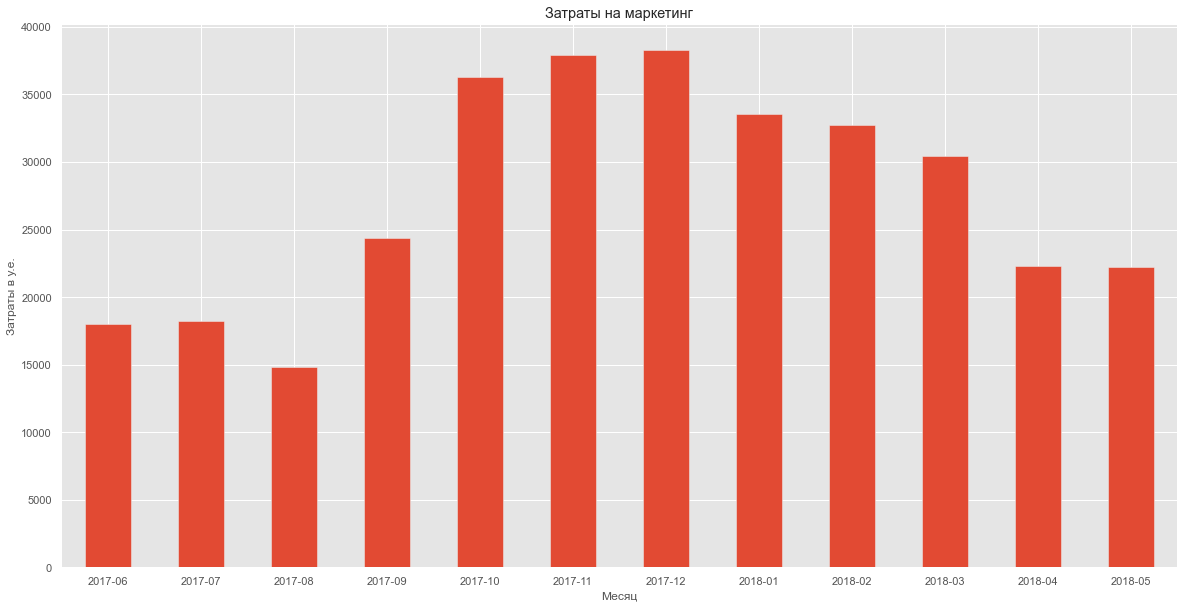

In [77]:
cost_month.plot.bar(
    x='month',
    y='costs', 
    grid=True,
    figsize=(20,10)
)
plt.title('Затраты на маркетинг')
plt.ylabel('Затраты в у.е.')
plt.xlabel('Месяц')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

По графику видим, что затраты на маркетинг имеют большой рост после августа 2017 года и в декабре начинают постепенно снижаться, вероятно была разработана новая маркетинговая стратегия по привлечению новых клиентов. Посмотрим, как распределены расходы в зависимости от разных источников трафика по месяцам и построим графики.

In [78]:
cost_source = cost_pivot_time.pivot_table(
    index='month', columns='source_id', values='costs', aggfunc='sum'
).reset_index()
cost_source.head()

source_id,month,1,2,3,4,5,9,10
0,2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24


In [87]:
!pip install seaborn

ValueError: min() arg is an empty sequence

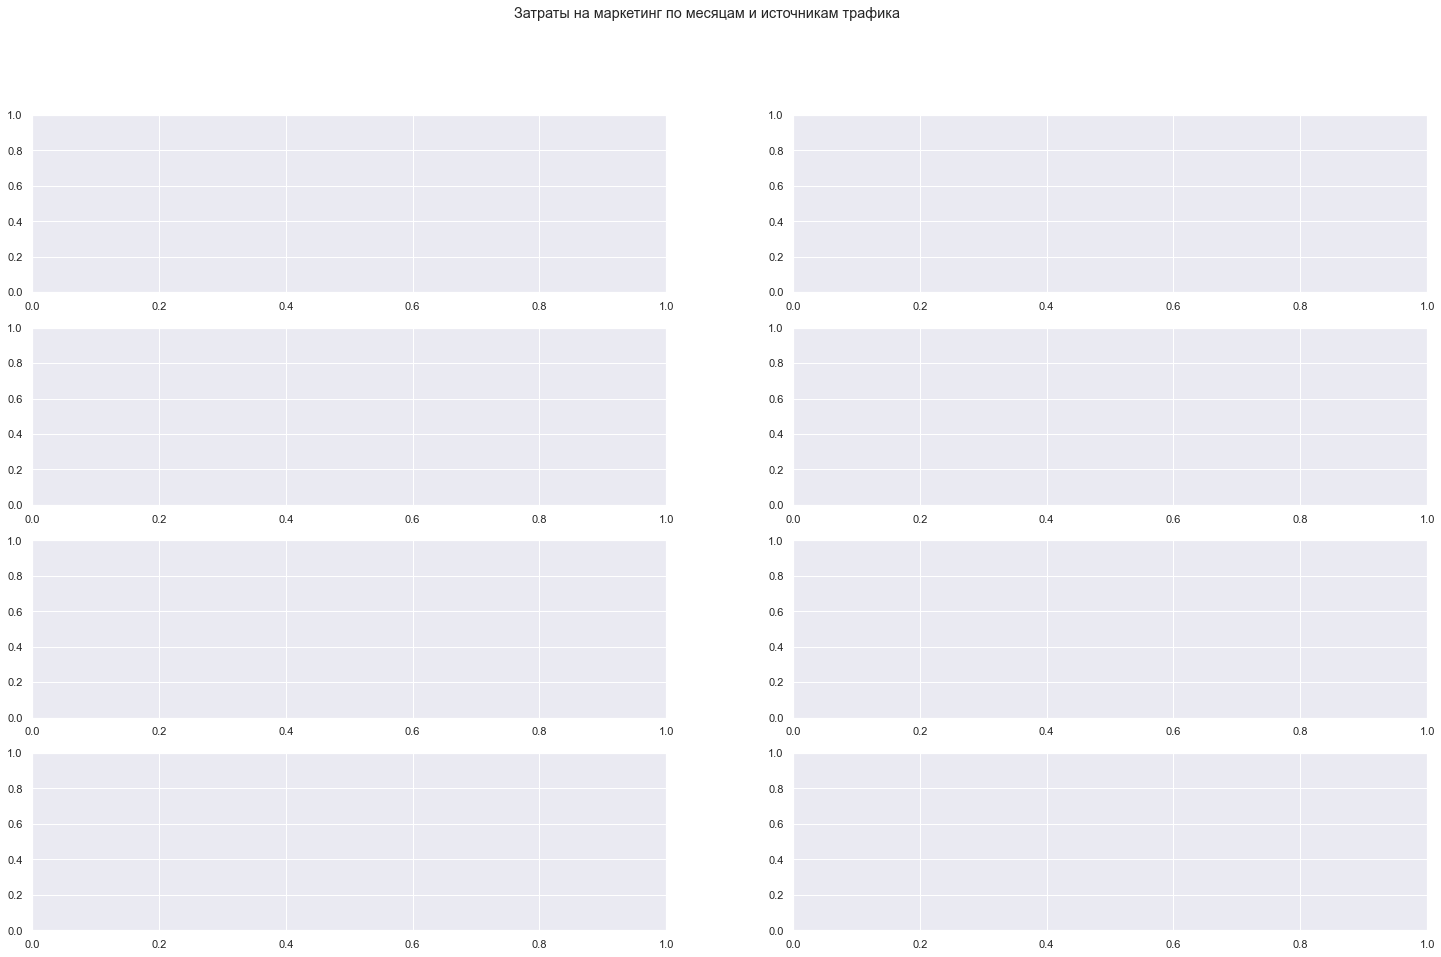

In [88]:
import seaborn as sns # вызываем библиотеку seaborn
sns.set()

fig, axes = plt.subplots(4, 2, figsize=(25, 15)) # задаем положение графиков рядом

fig.suptitle('Затраты на маркетинг по месяцам и источникам трафика')

sns.barplot(ax=axes[0, 0], data=cost_pivot_time.query('source_id == "1"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 1 источнику", fontsize=14
                                                            )
sns.barplot(ax=axes[0, 1], data=cost_pivot_time.query('source_id == "2"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 2 источнику", fontsize=14
                                                            )
sns.barplot(ax=axes[1, 0], data=cost_pivot_time.query('source_id == "3"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 3 источнику", fontsize=14
                                                            )
sns.barplot(ax=axes[1, 1], data=cost_pivot_time.query('source_id == "4"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 4 источнику", fontsize=14
                                                            )
sns.barplot(ax=axes[2, 0], data=cost_pivot_time.query('source_id == "5"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 5 источнику", fontsize=14
                                                          )
sns.barplot(ax=axes[2, 1], data=cost_pivot_time.query('source_id == "9"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 9 источнику", fontsize=14
                                                            )
sns.barplot(ax=axes[3, 0], data=cost_pivot_time.query('source_id == "10"'), 
            x='month', y='costs').set_xlabel("Затраты на маркетинг по 10 источнику", fontsize=14
                                                            )

plt.show()

Практически по всем источникам трафика сохраняется общий тренд распределения затрат на маркетинг по месяцам, кроме 4 источника, там больше всего денег вложили в декабря, а не в ноябре, как в остальные источники. Возможно, обратили внимание, что этот источник трафика "приводит" много посетителей и решили больше вложиться в него.

Проведем рассчет стоимости привлечения новых клиентов (САС) в зависимости от источника трафика.

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [ ]:
order_cac = orders_log.copy()
visit_cac = visits_log.copy()
cost_cac = costs.copy()

In [ ]:
order_cac['buy_ts'] = order_cac['buy_ts'].astype('datetime64[D]')

In [ ]:
# Определяем первую дату заказа для каждого пользователя
first_order_cac = order_cac.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_order_cac.columns = ['uid', 'first_order_date']

In [ ]:
first_order_cac['first_order_date'] = first_order_cac['first_order_date'].dt.date

In [ ]:
# Формируем таблицу с источниками, через которые сделан первый заказ
visit_cac['start_ts_date'] = visit_cac['start_ts'].astype('datetime64[D]')
visit_cac = visit_cac.sort_values('start_ts').groupby('uid').first().reset_index()

In [ ]:
# Объединяем полученные таблицы
source_first_visit = pd.merge(first_order_cac, visit_cac, on='uid')

In [ ]:
# Группируем таблицу по источнику и дате первого заказа, считаем количество покупателей
source_first_visit_grouped = source_first_visit.groupby(
    ['source_id', 'first_order_date']
).agg({'uid': 'nunique',}).reset_index()

In [ ]:
source_first_visit_grouped = source_first_visit_grouped.rename(columns={'uid': 'n_buyers'})

In [ ]:
# Объединяем полученную таблицу с таблицей с расходами на маркетинг
cost_source = pd.merge(source_first_visit_grouped, cost_cac,
                          left_on=['source_id','first_order_date'], right_on=['source_id','dt'], how='inner')

In [ ]:
# Считаем САС, делим затраты на колмчество пользователей
cost_source['cac'] = cost_source['costs'] / cost_source['n_buyers']
cac_source = cost_source.groupby('source_id')['cac'].mean().reset_index()
cac_source

Построим график зависимости затра на привлечение клиента в зависимости от источника трафика.

In [ ]:
plt.style.use('ggplot')
cac_source.plot.bar(
    x='source_id',
    y='cac', 
    grid=True,
    figsize=(20,10)
)
plt.title('Затраты на привлечение клиента по источникам трафика')
plt.ylabel('Стоимость привлечения клиента')
plt.xlabel('Источник рекламы')
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

Больше всего средств было потрачено на рекламу через источники 2 и 3. Рассчитаем САС на одного покупателя.

In [ ]:
cac_total = cost_source['costs'].sum() / cost_source['n_buyers'].sum()
cac_total

В среднем на привлечение одного клиента было потрачено 8.97 у.е.

Теперь займемся рассчетом возврата маркетинговых инвестиций (ROMI), для этого нам необходимо рассчитать LTV в разрезе источников трафика.

In [ ]:
visit_romi = visits_log.copy()
visit_romi['start_ts_date'] = visit_romi['start_ts'].astype('datetime64[D]')
visit_romi = visit_romi.sort_values('start_ts').groupby('uid').first().reset_index()

In [ ]:
source_romi = pd.merge(first_order, visit_romi, on='uid')
source_romi.head()

Посчитаем количество покупок по каждому источнику.

In [ ]:
source_romi.groupby('source_id')['source_id'].count()

Через источник 7 всего одна покупка, она помешает провести дальнейший анализ, поэтмоу удалим эту строку из таблицы.

In [ ]:
source_romi = source_romi.query('source_id != "7"')

Создадим цикл, который для каждого источника выполняет когортный анализ и считает LTV за 6 месяцев.

In [ ]:

for source_id, query in source_romi.groupby('source_id'):
    
        cohort_sizes_romi = query.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
        cohort_sizes_romi.columns = ['first_order_month', 'n_buyers']
    
        cohorts_romi = (
            query.groupby(['first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
    
        report_romi = pd.merge(cohort_sizes_romi, cohorts_romi, on='first_order_month')
    
        report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
    
        report_romi['age'] = report_romi['age'].round().astype('int')
    
        report_romi['ltv'] = report_romi['revenue'] / report_romi['n_buyers']

        report_romi['first_order_month'] = report_romi['first_order_month'].astype('str')

        output_romi = report_romi.pivot_table(
            index='first_order_month', columns='age', values='ltv', aggfunc='mean'
        ).round(2)

        output_romi.fillna('') 

        output_romi = output_romi.cumsum(axis=1).round(2) 
    
        ltv_source = output_romi[6].mean()
       
        print(source_id, round(ltv_source, 2)) #выводим источник трафика и соответствующий ему LTV за 6 месяцев
       

In [ ]:
cac_source['cac'].round(2)

In [ ]:
# создаем датафрейм для расчет ROMI
romi = pd.DataFrame({'source_id' : [1, 2, 3, 4, 5, 9, 10],
                     'ltv_source' : [13.76, 12.83, 5.96, 6.81, 10.33, 6.26, 3.94], 
                     'cac_source': [9.49, 16.29, 15.58, 7.27, 8.34, 6.84, 6.56]})
romi

In [ ]:
# рассчитываем ROMI
romi['romi'] = romi['ltv_source'] / romi['cac_source']
romi

Посмотрим, как меняется ROMI в зависимости от источника трафика на графике.

In [ ]:
plt.style.use('ggplot')
romi.plot.bar(
    x='source_id',
    y='romi', 
    grid=True,
    figsize=(20,10)
)
plt.title('Окупаемость источников трафика')
plt.ylabel('ROMI')
plt.xlabel('Источник трафика')
plt.axhline(y=1, color='black', linestyle='--') 
plt.xticks(rotation=360)
plt.legend().remove()
plt.show()

По графику видим, что вложения на маркетинг окупились по 1 и 5 источникам трафика.

## ОБЩИЙ ВЫВОД

Мы провели анализ данных о посещениях сайта Яндекс.Афиши, выгрузки заказов и статистики рекламных расходов.

Мы выяснили, что у сайта хороший уровень вовлеченности аудитории, в декабре приходит наибольшее количество уникальных пользователей, а средняя пользовательская сессия длится 1 минуту.

Мы провели когортный анализ и рассчитали *Retention Rate*, отметили, что пользователи возвращаются на сайт с течением времени.

Оценили покупательское поведение посетителей: чаще всего посетители проводят одну минуту на сайте до совершения покупки, но в "среднем" с момента первого посещения сайта до совершения покупки проходит 16 минут, обычно пользователи совершают 1-2 покупки за исследуемый период, те редко возвращаются снова.

Рассмотрели изменение среднего чека покупки во времени, максимального значения он достигает в декабре, что обсуловленно праздничным сезоном. Средний чек за весь рассматриваемый период - 4.96 у.е.

Посчитали пожизненную ценность клиента (LTV), сделали вывод, что наиболее ценными являются когорты июня и сентября 2017 года.
Мы посчитали, чтобы вложения в маркетинг окупались, привлечение одного покупателя не должно превышать 7.97 у.е. в месяц.

Мы выяснили, что окупились 1 и 5 источники рекламы, 6 и 7 - почти не привлекают посетителей, на 3 источник было затрачено максимальное количество средств и он меньше всего окупился, хоть и привлекает много новых посетителей.